# Exercício 1

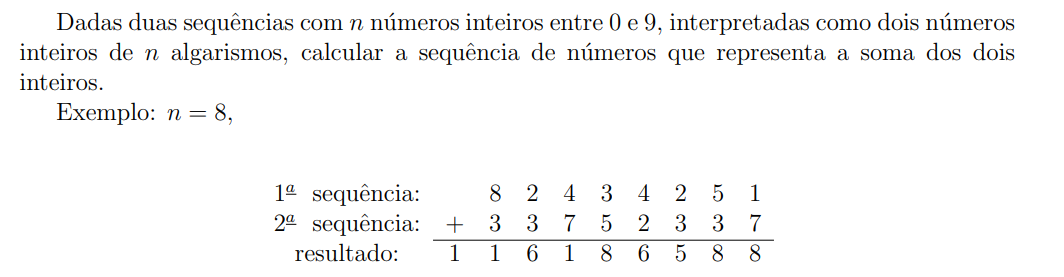

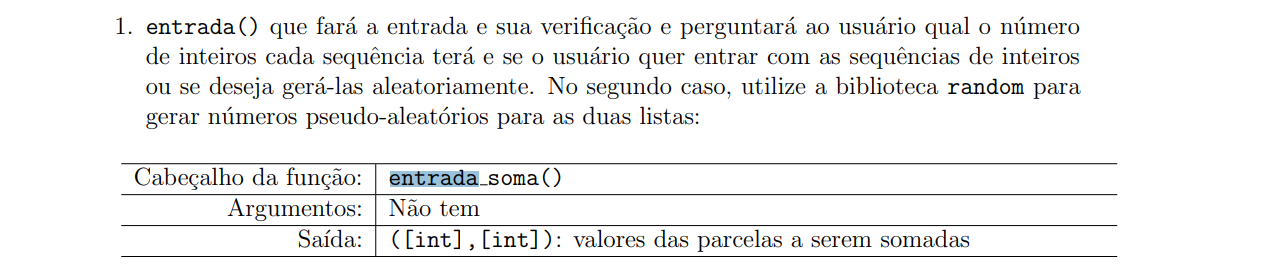

In [13]:
def entrada_soma():
    
    # Sequência de inteiros ou número aleatório
    input_errado = True
    while input_errado:
        entrada_1 = input("Deseja entrar com uma sequência de inteiros? ([Ss]/Nn) ")
        if entrada_1 == "S" or entrada_1 == "s" or entrada_1 == "":
            input_errado = False
            entrada_1 = "sequência"
        elif entrada_1 == "N" or entrada_1 == "n":
            input_errado = False
            entrada_1 = "aleatório"
        else:
            print("Você não digitou uma resposta válida!")    
    
    # Quantidade de dígitos em cada parcela 
    input_errado = True
    while input_errado:
        try:
            n = int(input("\nDigite o número de inteiros que cada sequência terá: "))
            input_errado = False
        except ValueError:
            print("Você não digitou um número inteiro!")

    # Geração de parcelas aleatórias
    if entrada_1 == "aleatório":
        import random
        valores_possiveis = [0,1,2,3,4,5,6,7,8,9]
        parcela_1 = random.sample(valores_possiveis, n)
        parcela_2 = random.sample(valores_possiveis, n)
        
    # Importação de uma sequência
    if entrada_1 == "sequência":
        parcela_1, parcela_2 = [], []
        
        for i in range(n):
            for j in range(2):
                digito = int(input(f"Digite o {i+1}º dígito da {j+1}ª parcela: "))
                if j == 0:
                    parcela_1.append(digito)
                else:
                    parcela_2.append(digito)
                    
    return parcela_1, parcela_2

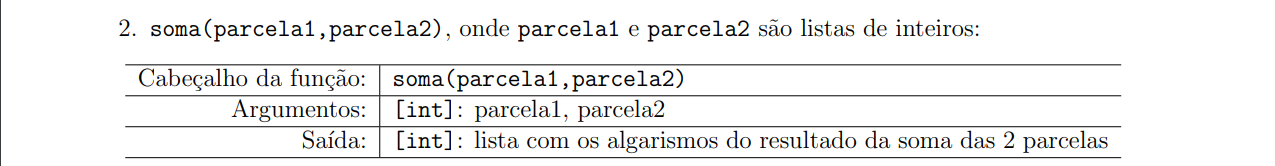

In [16]:
def soma(parcela_1, parcela_2):
    
    vai_1 = []
    resultado = []
    for i in range(len(parcela_1)):
                    
        # somando os dígitos partindo do último
        soma = parcela_1[-(i+1)] + parcela_2[-(i+1)]
        
        # verificando se vai 1
        if len(vai_1) > 0:
            if vai_1[i-1] == True:
                soma += 1
        
        # Caso não seja o último número do resultado (pois ele tem dois dígitos)
        if i != len(parcela_1)-1:
        
            # adicionando o dígito obtido ao vetor de resultados
            if soma < 10:
                resultado.append(soma)
                vai_1.append(False)
            else:
                soma = soma - 10
                resultado.append(soma)
                vai_1.append(True)
        else:
            digitos_finais = []
            for i in str(soma):
                digitos_finais.append(i) 
            digitos_finais = digitos_finais[::-1]
            
            for i in digitos_finais:
                resultado.append(int(i))
                
            vai_1.append(False)
        
    return resultado[::-1]

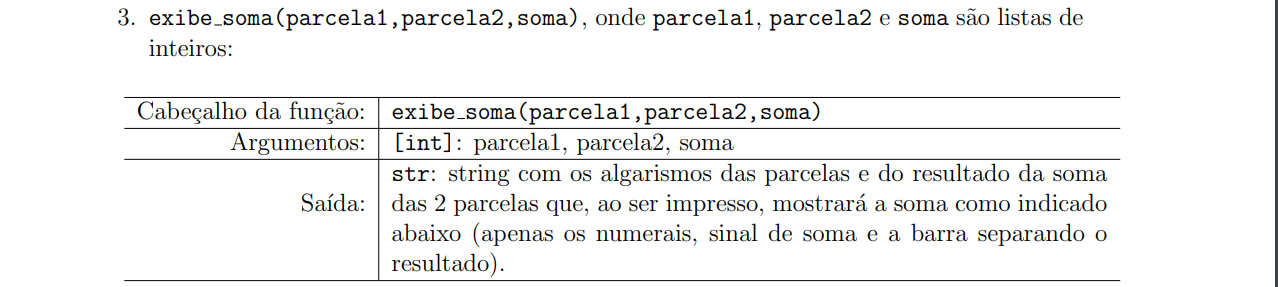

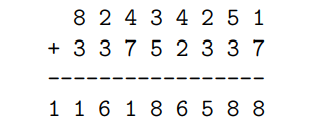

In [19]:
# Caso 2: os valores das parcelas são gerados automaticamente
parcelas = entrada_soma()
resultado = soma(parcelas[0], parcelas[1])
print()
print(exibe_soma(parcelas[0], parcelas[1], resultado))

Deseja entrar com uma sequência de inteiros? ([Ss]/Nn) n

Digite o número de inteiros que cada sequência terá: 4

  1 4 0 5
+ 5 3 4 2
---------
  6 7 4 7


In [135]:
parcela1 = [2,3,4,5,6,7,8,9]
parcela2 = [8,5,6,7,8,1,3,5]
soma_var = soma(parcela1, parcela2)

In [17]:
def exibe_soma(parcela1, parcela2, soma_var):
    # printando primeira parcela
    string_1 = " "
    for i in parcela1:
        string_1 += " " + str(i) 
    string_1 += "\n"
    
    # printando segunda parcela
    string_2 = "+"
    for i in parcela2:
        string_2 += " " + str(i)
    string_2 += "\n"
    
    # printando a barra do resultado
    string_3 = ((2*(len(parcela1)+1))-1) * "-"  + "\n"
    
    # printando resultado
    if len(soma_var) == len(parcela1):
        string_4 = "  "
    else:
        string_4 = ""
    for i in soma_var:
        string_4 += str(i) + " " 
    string_4 = string_4[:-1]
    
    return string_1 + string_2 + string_3 + string_4

In [138]:
print(exibe_soma(parcela1, parcela2, soma_var))

  2 3 4 5 6 7 8 9
+ 8 5 6 7 8 1 3 5
-----------------
1 0 9 1 3 4 9 2 4


# Exercício 2

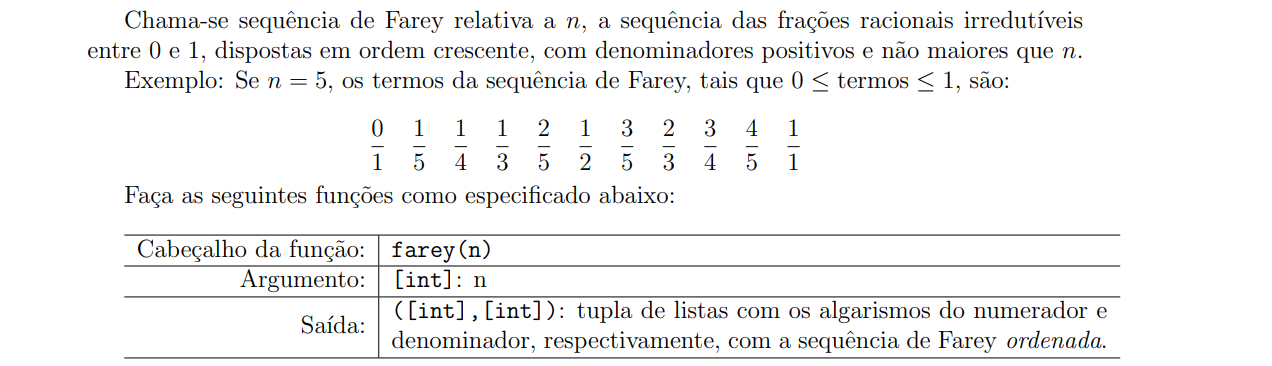

In [1]:
def farey(n):
    numeradores = []
    denominadores = []
    num_testados, den_testados, quocientes = [], [], []

    for num in list(range(n+1)):
        for den in list(range(1,n+1)):            
            quociente = num/den   
            
            if quociente in quocientes:
                pos = quocientes.index(quociente)
                
                for i in range(n):
                    if (numeradores[pos], denominadores[pos]) == (i*num, i*den):
                        numeradores.pop(pos)
                        denominadores.pop(pos)
                        quocientes.pop(pos)
                        
                        numeradores.append(num)
                        denominadores.append(den)
                        quocientes.append(quociente)
            else: 
                numeradores.append(num)
                denominadores.append(den)
                quocientes.append(quociente)
    
    resultado_em_tuplas = list(zip(quocientes, denominadores, numeradores))
    resultado_em_tuplas.sort()
    num_ordenado = [k for i,j,k in resultado_em_tuplas]
    den_ordenado = [j for i,j,k in resultado_em_tuplas]
    
    menores_que_1 = True
    i = 0
    while menores_que_1:
        if num_ordenado[i] / den_ordenado[i] > 1:
            num_ordenado = num_ordenado[:i]
            den_ordenado = den_ordenado[:i]
            menores_que_1 = False
        else:
            i += 1

    return num_ordenado, den_ordenado

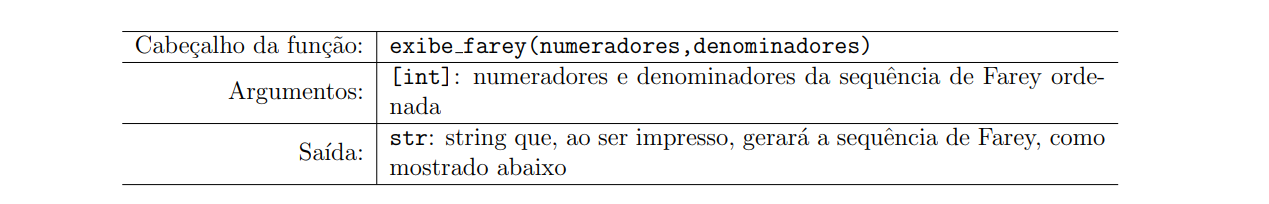

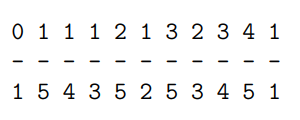

In [2]:
def exibe_farey(numeradores, denominadores):
    
    string_1 = ""
    for i in numeradores:
        string_1 += str(i) + " "
    string_1 = string_1[:-1]
    string_1 += "\n"
    
    string_2 = ""
    for i in denominadores:
        string_2 += "-" + " "
    string_2 = string_2[:-1]
    string_2 += "\n"
    
    string_3 = ""
    for i in denominadores:
        string_3 += str(i) + " "
    string_3 = string_3[:-1]
    
    return string_1 + string_2 + string_3

In [9]:
print(exibe_farey(farey(9)[0], farey(9)[1]))

0 1 1 1 1 1 2 1 2 1 3 2 3 4 1 5 4 3 5 2 5 3 7 4 5 6 7 8 1
- - - - - - - - - - - - - - - - - - - - - - - - - - - - -
1 9 8 7 6 5 9 4 7 3 8 5 7 9 2 9 7 5 8 3 7 4 9 5 6 7 8 9 1


In [8]:
n = 9
seq_farey = farey(9)
print("Sequência de Farey não formatada:\n", seq_farey, "\n")

print("Sequência de Farey formatada:\n", exibe_farey(seq_farey[0], seq_farey[1]))

Sequência de Farey não formatada:
 ([0, 1, 1, 1, 1, 1, 2, 1, 2, 1, 3, 2, 3, 4, 1, 5, 4, 3, 5, 2, 5, 3, 7, 4, 5, 6, 7, 8, 1], [1, 9, 8, 7, 6, 5, 9, 4, 7, 3, 8, 5, 7, 9, 2, 9, 7, 5, 8, 3, 7, 4, 9, 5, 6, 7, 8, 9, 1]) 

Sequência de Farey formatada:
 0 1 1 1 1 1 2 1 2 1 3 2 3 4 1 5 4 3 5 2 5 3 7 4 5 6 7 8 1
- - - - - - - - - - - - - - - - - - - - - - - - - - - - -
1 9 8 7 6 5 9 4 7 3 8 5 7 9 2 9 7 5 8 3 7 4 9 5 6 7 8 9 1


In [287]:
print(exibe_farey(num, den))

0 1 1 1 2 1 3 2 3 4 1
- - - - - - - - - - -
1 5 4 3 5 2 5 3 4 5 1


# Exercício 3

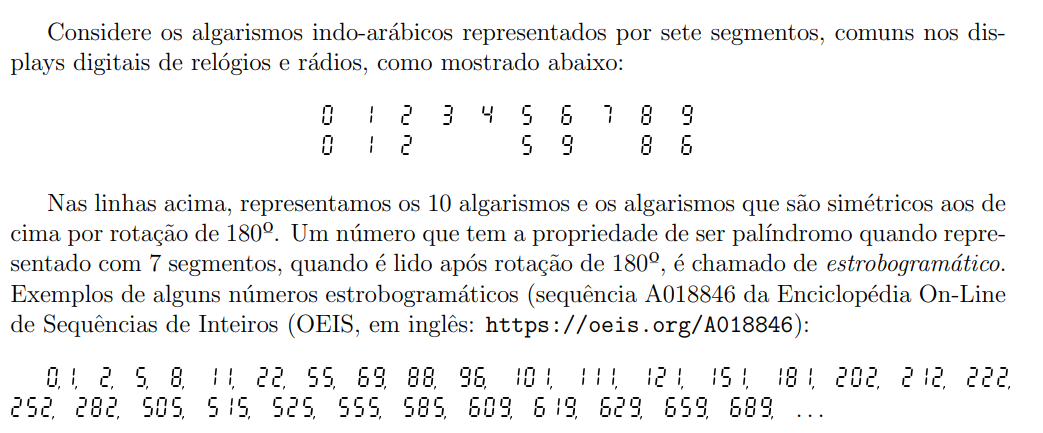

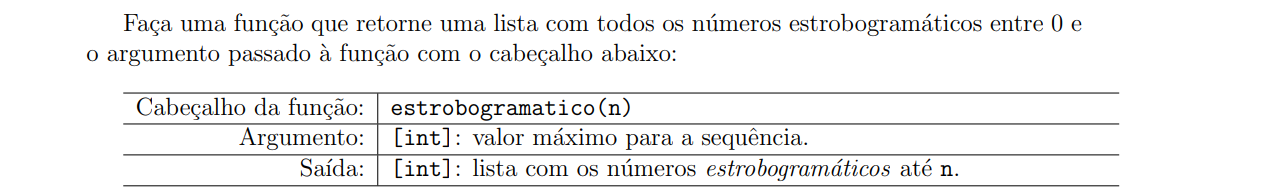

In [288]:
def estrobogramatico(n):
    
    pares_invertiveis = [("0","0"), ("1","1"), ("2","2"), ("5","5"), ("6","9"), ("8","8"), ("9","6")]    
    numeros = [str(i) for i in list(range(n+1))]
    resultado = []
    
    for num in numeros:
        estrobo = True
        for i in range(len(num)): # posicoes dos digitos
            par = (num[i], num[-(i+1)])
            if par not in pares_invertiveis:
                estrobo = False
        
        if estrobo:
            resultado.append(int(num))
            
    return resultado

In [290]:
print(estrobogramatico(689))

[0, 1, 2, 5, 8, 11, 22, 55, 69, 88, 96, 101, 111, 121, 151, 181, 202, 212, 222, 252, 282, 505, 515, 525, 555, 585, 609, 619, 629, 659, 689]
